Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = (150)
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
sns.set_theme(style='darkgrid',palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud_check (1).csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
# Adding Tax <= 30000 as "Risky" and others are "Good"
df['Tax_Good'] = pd.cut(df['Taxable.Income'],bins=[1000,30000,10000000],labels=['Risky','Good'])

In [7]:
df.drop(columns='Taxable.Income',inplace=True)

In [8]:
df['Tax_Good'] = df['Tax_Good'].astype(object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Tax_Good         600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [10]:
# Data Visualization 

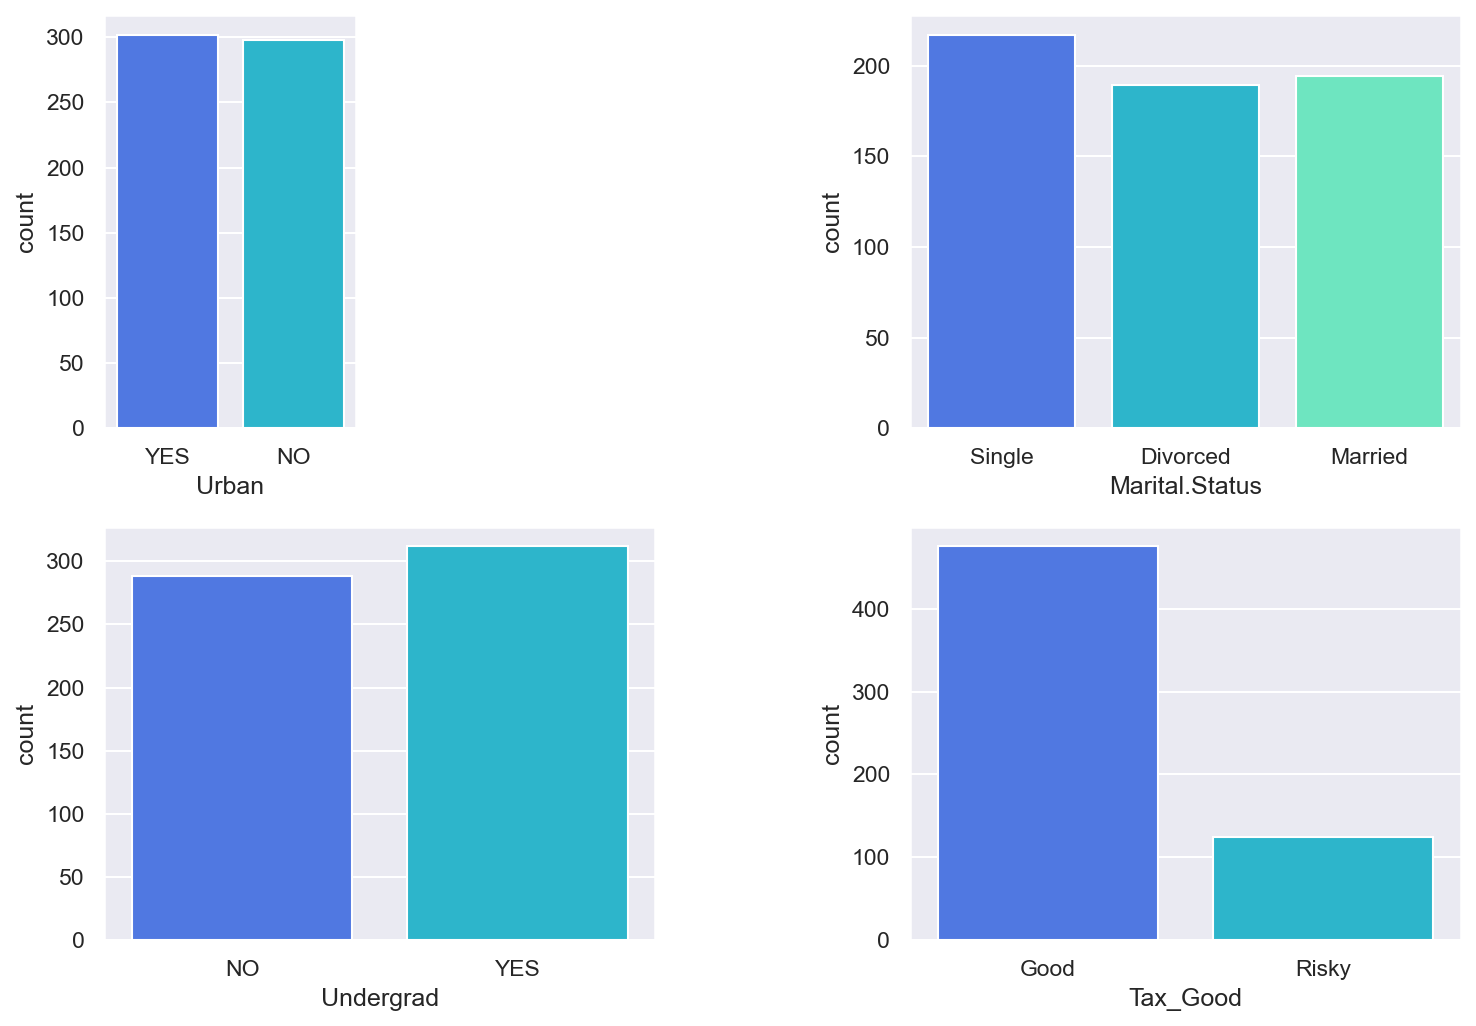

In [12]:
plt.subplot(2,4,1)
sns.countplot(x ='Urban',data=df)

plt.subplot(2,2,2)
sns.countplot(x ='Marital.Status',data=df)

plt.subplot(2,2,3)
sns.countplot(x ='Undergrad',data=df)

plt.subplot(2,2,4)
sns.countplot(x ='Tax_Good',data=df)

plt.tight_layout()

<Axes: >

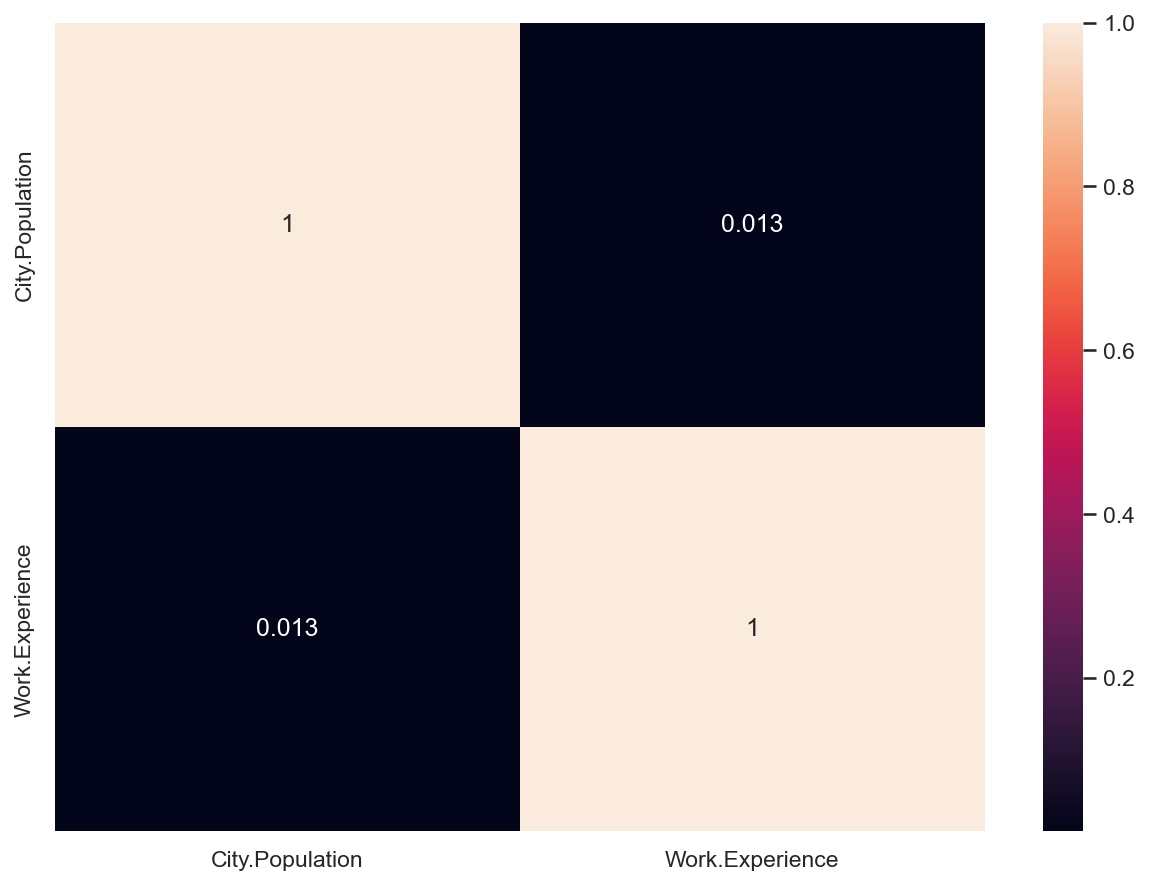

In [13]:
sns.heatmap(df.corr(),annot=True)

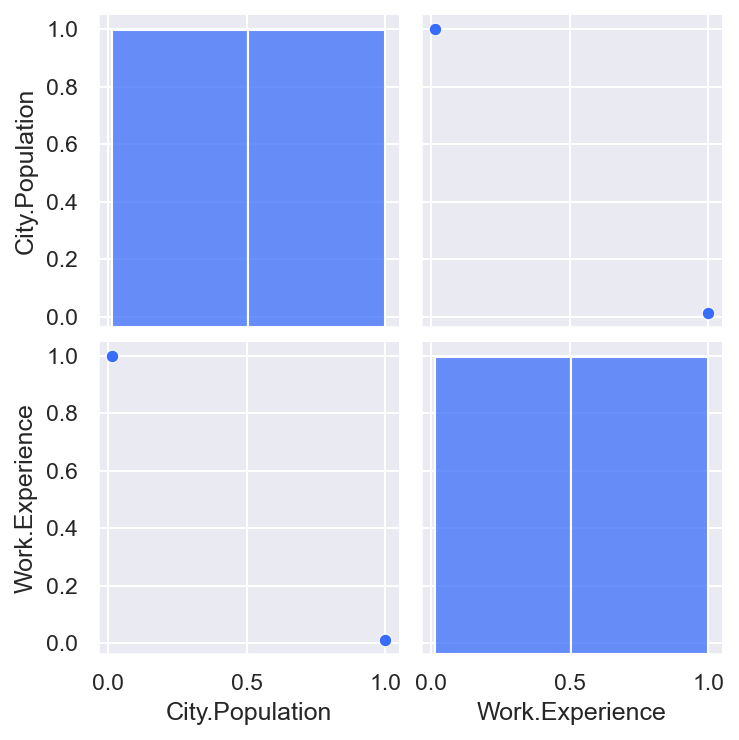

In [15]:
sns.pairplot(df.corr())

In [16]:
# Encoding categorical Columns

In [17]:
df_cate_cols = df.select_dtypes([object,]).columns

In [18]:
from sklearn.preprocessing import OrdinalEncoder ,StandardScaler

In [19]:
oe = OrdinalEncoder()
df[df_cate_cols] = oe.fit_transform(df[df_cate_cols])

In [20]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Good
0,0.0,2.0,50047,10,1.0,0.0
1,1.0,0.0,134075,18,1.0,0.0
2,0.0,1.0,160205,30,1.0,0.0
3,1.0,2.0,193264,15,1.0,0.0
4,0.0,1.0,27533,28,0.0,0.0
...,...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0,0.0
596,1.0,0.0,55369,2,1.0,0.0
597,0.0,0.0,154058,0,1.0,0.0
598,1.0,1.0,180083,17,0.0,0.0


In [21]:
x = df.iloc[:,:-1]
y = df['Tax_Good']

In [22]:
sc = StandardScaler()
sc.fit_transform(x)

array([[-1.040833  ,  1.16079994, -1.17852072, -0.62914254,  0.99335541],
       [ 0.96076892, -1.27444469,  0.50850002,  0.27636996,  0.99335541],
       [-1.040833  , -0.05682237,  1.03310911,  1.63463872,  0.99335541],
       ...,
       [-1.040833  , -1.27444469,  0.90969648, -1.76103318,  0.99335541],
       [ 0.96076892, -0.05682237,  1.43219749,  0.1631809 , -1.00668904],
       [-1.040833  , -1.27444469,  0.9915901 ,  0.04999184, -1.00668904]])

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [24]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)
print(f"Train Accuracy : {rfc.score(xtrain,ytrain)}\n Test Accuracy:{rfc.score(xtest,ytest)}")

Train Accuracy : 1.0
 Test Accuracy:0.7583333333333333


In [25]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86        97
         1.0       0.00      0.00      0.00        23

    accuracy                           0.76       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.76      0.70       120



# Hyperparameter Tunning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
rfc = RandomForestClassifier()

params = {
    'criterion': ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7]
}

In [28]:
grid = GridSearchCV(RandomForestClassifier(),params)

In [29]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [30]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [31]:
rfc = RandomForestClassifier(criterion='gini',max_depth=1)
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)
print(f"Train Accuracy : {rfc.score(xtrain,ytrain)}\n Test Accuracy:{rfc.score(xtest,ytest)}")

Train Accuracy : 0.7895833333333333
 Test Accuracy:0.8083333333333333


In [32]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        97
         1.0       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



Here we have 80% Accuracy, now we can say this is Generalize Model